In [2]:
# Importiere wichtige Bibliotheken
import pandas as pd  # Pandas wird verwendet, um Datenstrukturen wie DataFrames zu erstellen und zu manipulieren.
import numpy as np  # NumPy wird für mathematische Operationen und das Arbeiten mit Arrays verwendet.
import seaborn as sns  # Seaborn ist eine Bibliothek, die auf Matplotlib aufbaut und uns dabei hilft, ansprechende statistische Visualisierungen zu erstellen.
import matplotlib.pyplot as plt  # Matplotlib wird verwendet, um einfache und komplexe Diagramme und Plots zu erstellen.

In [3]:
file_path = 'Titanic.csv'

In [4]:
# Lade den Titanic-Datensat
df = pd.read_csv('Titanic.csv', sep=';')  # Lies die CSV-Datei 'Titanic.csv' ein und speichere sie in einem DataFrame.

In [5]:
# Zeige die ersten 5 Zeilen des Datensatzes an
df.head()  # Gibt die ersten 5 Zeilen des Titanic-Datensatzes zurück, um einen schnellen Überblick über die Struktur und den Inhalt der Daten zu erhalten.


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29,0.0,0.0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,"0,9167",1.0,2.0,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1.0,2.0,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# Überblick über den Datentyp und die Struktur des Titanic-Datensatzes
df.info()  # Gibt eine Übersicht über die Spalten, ihre Datentypen und die Anzahl der Nicht-Null-Werte in jeder Spalte zurück.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(5), object(9)
memory usage: 143.4+ KB


In [7]:
# Statistische Zusammenfassung der numerischen Daten im Datensatz
df.describe()  # Liefert eine Übersicht über statistische Kennzahlen (wie Mittelwert, Standardabweichung, Minimum, Maximum) für die numerischen Spalten des Titanic-Datensatzes.

,pclass,survived,sibsp,parch,body
count,1309.000000,1309.000000,1309.000000,1309.000000,121.000000
mean,2.294882,0.381971,0.498854,0.385027,160.809917
std,0.837836,0.486055,1.041658,0.865560,97.696922
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,72.000000
50%,3.000000,0.000000,0.000000,0.000000,155.000000
75%,3.000000,1.000000,1.000000,0.000000,256.000000
max,3.000000,1.000000,8.000000,9.000000,328.000000


In [8]:
# Prüfe, welche Spalten fehlende Werte enthalten und wie viele
df.isnull().sum()  # Das ist wichtig: Ich überprüfe, wie viele fehlende Werte es in jeder Spalte gibt. Dies hilft mir, den nächsten Schritt zu planen, ob ich sie auffüllen oder anders damit umgehen muss.

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [9]:
# Entferne Zeilen mit fehlenden Werten in spezifischen Spalten
df.dropna(subset=['pclass', 'survived', 'name', 'sex', 'sibsp', 'parch', 'ticket','fare','embarked'], inplace=True)  
# Ich lösche alle Zeilen, die in diesen wichtigen Spalten fehlende Werte haben. 
# Diese Spalten sind entscheidend für die Analyse und das Modell, daher will ich nur vollständige Daten behalten.
# 'inplace=True' sorgt dafür, dass die Änderungen direkt am DataFrame vorgenommen werden.
# Da es wenig Werte sind pro Spalte (<1%) ändert es nichts am Endergebnis

In [10]:
df.isnull().sum() #Überprüfung der vorgenommenen Operation

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        0
boat          822
body         1186
home.dest     562
dtype: int64

In [11]:
# Extrahiere das Deck aus der 'cabin'-Spalte und fülle fehlende Werte mit 'Unknown'
df['deck'] = df['cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'Unknown')  
# Ich benutze 'Unknown' anstelle des Löschens von Zeilen, da ich wichtige Informationen in anderen Spalten (wie 'survived', 'sex', etc.) behalten will.
# Viele Zeilen haben keine Kabineninformationen, aber das Löschen würde unnötig viele Daten entfernen.
# 'Unknown' ermöglicht es dem Modell, fehlende Kabineninformationen als separate Kategorie zu behandeln, ohne Datenverlust zu riskieren.

In [12]:
df['cabin'] = df['cabin'].fillna('Unknown')

In [13]:
df.isnull().sum() # Überprüfung der vorgenommenen Operation

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat          822
body         1186
home.dest     562
deck            0
dtype: int64

In [14]:
df['boat'] = df['boat'].fillna('No Boat') #Alle fehlenden Werte in Spalte Boat sollen durch 'No Boat' ersetzt werden 

In [15]:
df.isnull().sum() #Überprüfung

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat            0
body         1186
home.dest     562
deck            0
dtype: int64

In [16]:
# Entferne die 'body'-Spalte aus dem DataFrame
df.drop(columns=['body'], inplace=True)  
# Ich entferne die 'body'-Spalte, weil sie entweder zu viele fehlende Werte hat und nicht relevant für meine Analyse bzw. das Modell ist.
# 'inplace=True' sorgt dafür, dass die Änderung direkt im ursprünglichen DataFrame vorgenommen wird.

In [17]:
df.isnull().sum() #Überprüfung

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
boat           0
home.dest    562
deck           0
dtype: int64

In [18]:
# Fülle fehlende Werte in der 'home.dest'-Spalte mit 'Unknown' auf
df['home.dest'] = df['home.dest'].fillna('Unknown')  
# Ich fülle die fehlenden Werte in der 'home.dest'-Spalte mit 'Unknown', damit ich keine wichtigen Daten verliere. 
# So kann ich später flexibel entscheiden, ob diese Spalte wichtig ist oder nicht.

# Entferne die 'home.dest'-Spalte aus dem DataFrame
df.drop(columns=['home.dest'], inplace=True)  
# Nachdem ich die fehlenden Werte gefüllt habe, entscheide ich mich, die 'home.dest'-Spalte zu entfernen, 
# da sie nicht relevant für meine Analyse oder das Modell ist. 
# 'inplace=True' sorgt dafür, dass die Änderung direkt im ursprünglichen DataFrame stattfindet.

In [19]:
df.isnull().sum() #Überprüfung

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
embarked      0
boat          0
deck          0
dtype: int64

In [20]:
print(df['age'].unique()) #Überprüfung der Schreibweise in Spalte 'Age'

['29' '0,9167' '2' '30' '25' '48' '63' '39' '53' '71' '47' '18' '24' '26'
 '80' nan '50' '32' '36' '37' '42' '19' '35' '28' '45' '40' '58' '22' '41'
 '44' '59' '60' '33' '17' '11' '14' '49' '76' '46' '27' '64' '55' '70'
 '38' '51' '31' '4' '54' '23' '43' '52' '16' '32,5' '21' '15' '65' '28,5'
 '45,5' '56' '13' '61' '34' '6' '57' '62' '67' '1' '12' '20' '0,8333' '8'
 '0,6667' '7' '3' '36,5' '18,5' '5' '66' '9' '0,75' '70,5' '22,5' '0,3333'
 '0,1667' '40,5' '10' '23,5' '34,5' '20,5' '30,5' '55,5' '38,5' '14,5'
 '24,5' '74' '0,4167' '11,5' '26,5']


In [21]:
# Konvertiere die 'age'-Spalte in den Datentyp 'string', um Formatierungsproblemen zu entgehen
df['age'] = df['age'].astype(str)  
# Ich wandle die 'age'-Spalte von einem numerischen Wert in einen String um, um der Formatierung von Zahlen aus dem Weg zu gehen. 
# Dadurch muss ich mich nicht mit Dezimalstellen oder fehlenden Werten bei der Altersangabe auseinandersetzen.

In [22]:
# Ersetze Kommas durch Punkte in der 'age'-Spalte
df['age'] = df['age'].str.replace(',', '.')  
# Da ich das Alter als String konvertiert habe, ersetze ich jetzt Kommas durch Punkte in der 'age'-Spalte.
# Das ist wichtig, um mögliche Formatierungsprobleme zu beheben, insbesondere wenn die Altersangaben mit Komma statt Punkt vorliegen.
# Dadurch stelle ich sicher, dass die Alterswerte korrekt dargestellt werden, falls ich sie später für Berechnungen oder Vergleiche wieder in Zahlen umwandle.

In [23]:
# Konvertiere die 'age'-Spalte zurück zu numerischen Werten und setze ungültige Einträge auf NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')  
# Ich wandle die 'age'-Spalte wieder in numerische Werte um. 
# Mit 'errors="coerce"' sorge ich dafür, dass alle nicht-konvertierbaren Werte (z. B. leere oder ungültige Strings) in NaN umgewandelt werden.
# Das ist hilfreich, um sicherzustellen, dass nur gültige numerische Werte in der Spalte vorhanden sind und ich mit diesen weiter rechnen kann.

In [24]:
# Fülle fehlende Werte in der 'age'-Spalte mit dem Medianwert auf
df['age'] = df['age'].fillna(df['age'].median())  
# Ich ersetze die fehlenden Alterswerte (NaN) durch den Median des Alters. 
# Der Median ist eine gute Wahl, weil er weniger anfällig für Ausreißer ist als der Durchschnitt.
# Dadurch stelle ich sicher, dass alle Einträge in der 'age'-Spalte gültige numerische Werte haben und mein Modell nicht durch fehlende Werte beeinträchtigt wird.

In [25]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
boat        0
deck        0
dtype: int64

In [26]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['pclass'] = df['pclass'].astype('category')

In [27]:
print(df.dtypes)

pclass      category
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare          object
cabin         object
embarked      object
boat          object
deck          object
dtype: object


<Axes: ylabel='age'>

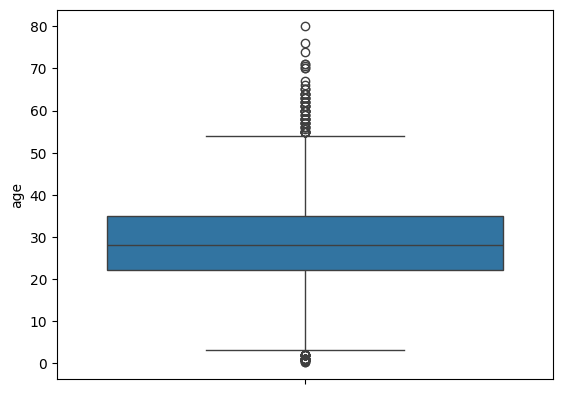

In [28]:
sns.boxplot(df['age'])


In [29]:
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)


In [30]:
print(df.dtypes)

pclass        category
survived       float64
name            object
age            float64
sibsp          float64
parch          float64
ticket          object
fare            object
cabin           object
boat            object
deck            object
sex_male          bool
embarked_Q        bool
embarked_S        bool
dtype: object


In [31]:
# Kommas in Punkten umwandeln
df['fare'] = df['fare'].str.replace(',', '.')
# In numerischen Typ konvertieren
df['fare'] = pd.to_numeric(df['fare'], errors='coerce')


In [32]:
# Konvertiere die Spalten 'cabin', 'boat' und 'deck' in den Kategorie-Datentyp
df['cabin'] = df['cabin'].astype('category')  
df['boat'] = df['boat'].astype('category')  
df['deck'] = df['deck'].astype('category')  
# Ich wandle die Spalten 'cabin', 'boat' und 'deck' in den Datentyp 'category' um, da diese Werte diskrete Kategorien darstellen.
# Dies spart Speicherplatz und verbessert die Verarbeitungsgeschwindigkeit, da kategorische Daten effizienter verarbeitet werden als Strings.
# Außerdem hilft es, diese Spalten klar als Kategorien zu markieren, was für die Modellierung nützlich ist (z.B. für Algorithmen, die mit kategorialen Daten arbeiten).


In [33]:
print(df.dtypes)


pclass        category
survived       float64
name            object
age            float64
sibsp          float64
parch          float64
ticket          object
fare           float64
cabin         category
boat          category
deck          category
sex_male          bool
embarked_Q        bool
embarked_S        bool
dtype: object


In [34]:
df.drop_duplicates(inplace=True) #Duplikaten löschen, wenn vorhanden

In [35]:
df.isnull().sum() #Überprüfung Nullwerte

pclass        0
survived      0
name          0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
boat          0
deck          0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [36]:
df.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,boat,deck,sex_male,embarked_Q,embarked_S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,2,B,False,False,True
1,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,11,C,True,False,True
2,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,No Boat,C,False,False,True
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1.0,2.0,113781,151.5500,C22 C26,No Boat,C,True,False,True
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1.0,2.0,113781,151.5500,C22 C26,No Boat,C,False,False,True


In [37]:
# Speichere den bereinigten Titanic-Datensatz in einer neuen CSV-Datei
df.to_csv('bereinigter_titanic_datensatz.csv', index=False)  
# Ich speichere den bereinigten Datensatz als CSV-Datei ab, um meine Änderungen festzuhalten.
# Mit 'index=False' stelle ich sicher, dass der DataFrame-Index nicht in die CSV-Datei geschrieben wird, 
# da der Index hier nicht relevant für die Datenanalyse ist.

<Axes: xlabel='pclass', ylabel='count'>

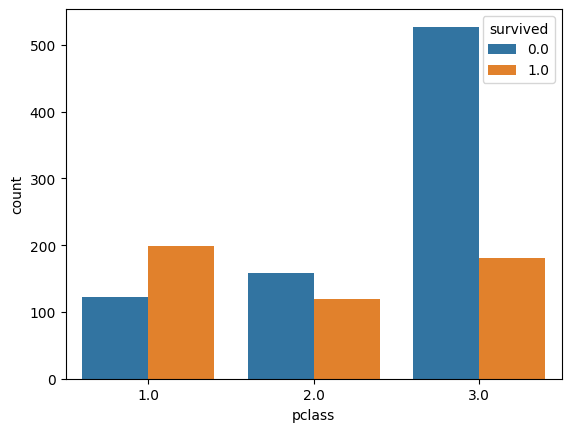

In [38]:
sns.countplot(x='pclass', hue= 'survived', data=df)

<Axes: xlabel='age', ylabel='Count'>

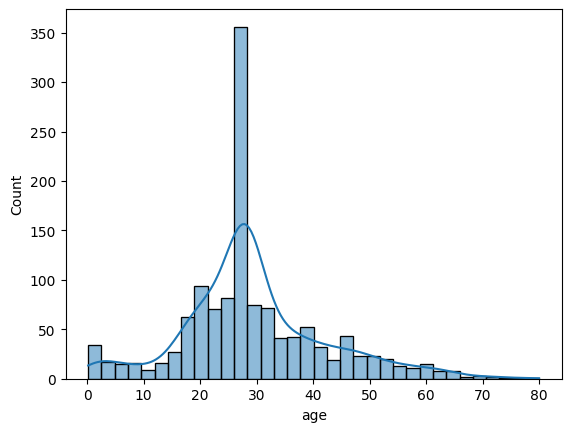

In [39]:
sns.histplot(df['age'],kde= True)

In [40]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

In [41]:
df['is_alone'] = (df['family_size'] == 1).astype(int)

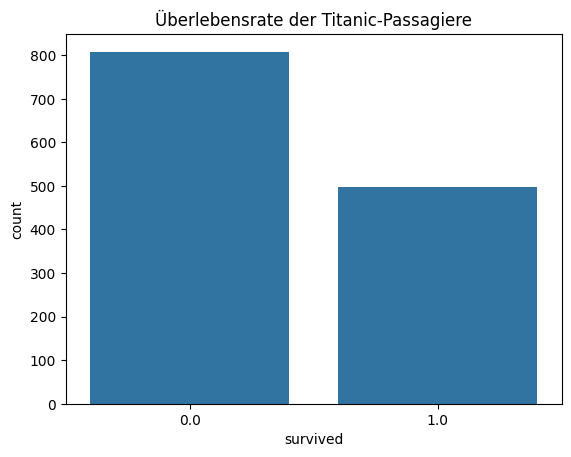

In [42]:
sns.countplot(x='survived', data=df)
plt.title('Überlebensrate der Titanic-Passagiere')
plt.show()


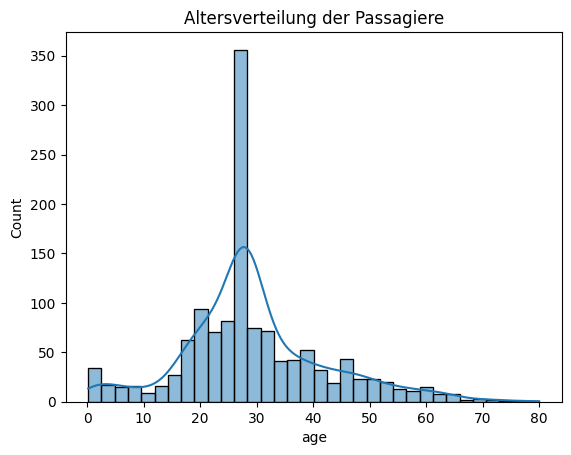

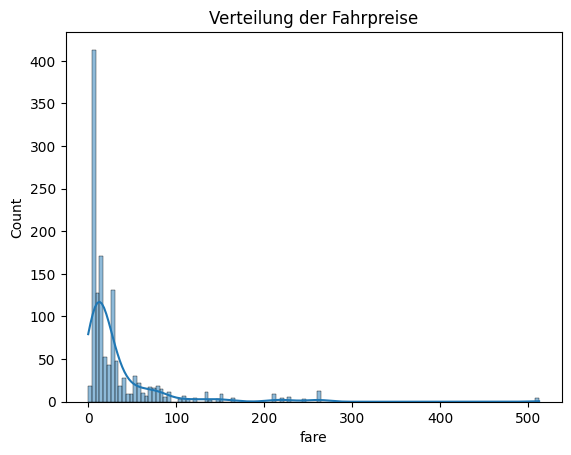

In [43]:
sns.histplot(df['age'], kde=True)
plt.title('Altersverteilung der Passagiere')
plt.show()

sns.histplot(df['fare'], kde=True)
plt.title('Verteilung der Fahrpreise')
plt.show()

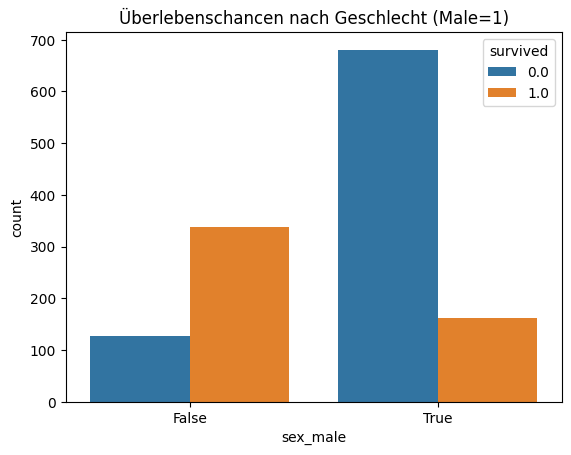

In [44]:
sns.countplot(x='sex_male', hue='survived', data=df)
plt.title('Überlebenschancen nach Geschlecht (Male=1)')
plt.show()

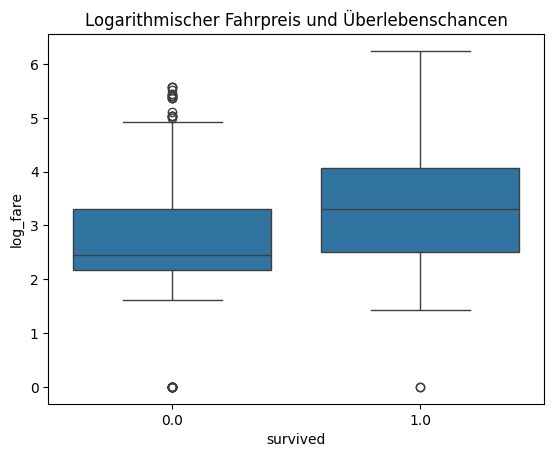

In [45]:
df['log_fare'] = np.log1p(df['fare'])  # Logarithmische Skalierung von Fare

# Boxplot mit logarithmisch skaliertem Fahrpreis
sns.boxplot(x='survived', y='log_fare', data=df)
plt.title('Logarithmischer Fahrpreis und Überlebenschancen')
plt.show()

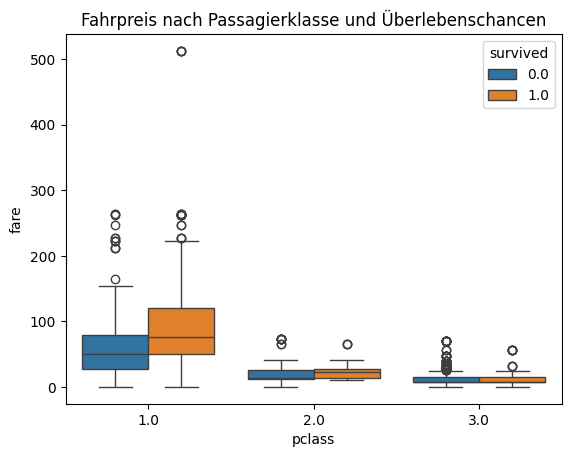

In [46]:
# Boxplot von Fare nach Pclass und Überlebenschancen
sns.boxplot(x='pclass', y='fare', hue='survived', data=df)
plt.title('Fahrpreis nach Passagierklasse und Überlebenschancen')
plt.show()


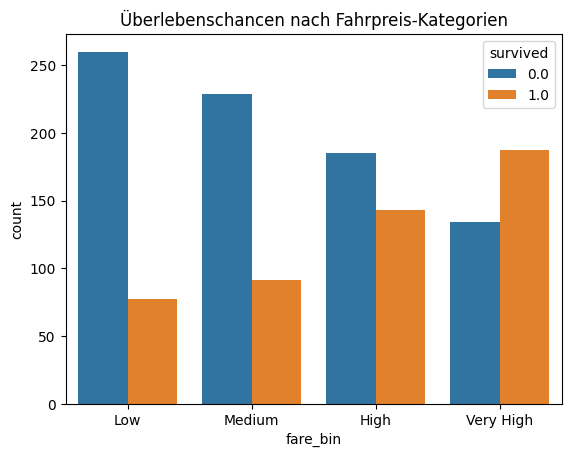

In [47]:
# Fahrpreise in Kategorien unterteilen
df['fare_bin'] = pd.qcut(df['fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Überlebenschancen nach Fare-Kategorien
sns.countplot(x='fare_bin', hue='survived', data=df)
plt.title('Überlebenschancen nach Fahrpreis-Kategorien')
plt.show()


In [48]:
from sklearn.model_selection import train_test_split

# Features und Zielvariable (Survived)
X = df.drop(columns=['survived'])  # Unabhängige Variablen
y = df['survived']  # Zielvariable

# Aufteilung der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
from sklearn.preprocessing import StandardScaler

# Initialisierung des Scalers
scaler = StandardScaler()

# Skalieren der numerischen Features in den Trainings- und Testdaten (age und fare)
X_train[['age', 'fare']] = scaler.fit_transform(X_train[['age', 'fare']])
X_test[['age', 'fare']] = scaler.transform(X_test[['age', 'fare']])


In [50]:
# Zeige alle Spaltennamen im DataFrame an
print(X.columns)

Index(['pclass', 'name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin',
       'boat', 'deck', 'sex_male', 'embarked_Q', 'embarked_S', 'family_size',
       'is_alone', 'log_fare', 'fare_bin'],
      dtype='object')


In [51]:
# Entferne die nicht numerischen Spalten aus dem DataFrame
X = X.drop(columns=['name', 'ticket', 'cabin'], errors='ignore')

In [52]:
print(X.columns)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'boat', 'deck', 'sex_male',
       'embarked_Q', 'embarked_S', 'family_size', 'is_alone', 'log_fare',
       'fare_bin'],
      dtype='object')


In [53]:
print(X.dtypes)

pclass         category
age             float64
sibsp           float64
parch           float64
fare            float64
boat           category
deck           category
sex_male           bool
embarked_Q         bool
embarked_S         bool
family_size     float64
is_alone          int64
log_fare        float64
fare_bin       category
dtype: object


In [54]:
# Kategorische Variablen in Dummy-Variablen umwandeln
X = pd.get_dummies(X, columns=['pclass', 'boat', 'deck', 'fare_bin'], drop_first=True)


In [55]:
print(X.dtypes)

age                   float64
sibsp                 float64
parch                 float64
fare                  float64
sex_male                 bool
embarked_Q               bool
embarked_S               bool
family_size           float64
is_alone                int64
log_fare              float64
pclass_2.0               bool
pclass_3.0               bool
boat_10                  bool
boat_11                  bool
boat_12                  bool
boat_13                  bool
boat_13 15               bool
boat_13 15 B             bool
boat_14                  bool
boat_15                  bool
boat_15 16               bool
boat_16                  bool
boat_2                   bool
boat_3                   bool
boat_4                   bool
boat_5                   bool
boat_5 7                 bool
boat_5 9                 bool
boat_6                   bool
boat_7                   bool
boat_8                   bool
boat_8 10                bool
boat_9                   bool
boat_A    

In [56]:
# Überprüfe, ob es noch nicht-numerische Spalten gibt
print(X_train.dtypes)


pclass         category
name             object
age             float64
sibsp           float64
parch           float64
ticket           object
fare            float64
cabin          category
boat           category
deck           category
sex_male           bool
embarked_Q         bool
embarked_S         bool
family_size     float64
is_alone          int64
log_fare        float64
fare_bin       category
dtype: object


In [57]:
# Problematische Zeilen finden, die nicht in numerische Werte umgewandelt werden können
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(X_train[col].unique())


['Mamee, Mr. Hanna' 'Astor, Col. John Jacob' 'Harrington, Mr. Charles H'
 ... 'Wiseman, Mr. Phillippe' 'Hellstrom, Miss. Hilda Maria'
 'Petroff, Mr. Pastcho ("Pentcho")']
['2677' 'PC 17757' '113796' '220367' '28664' 'SOTON/O.Q. 3101263' '29750'
 '248738' '349211' 'C.A. 31921' 'PC 17569' '244252' 'PC 17754'
 'SOTON/OQ 392083' '2543' '2664' 'SC/A.3 2861' '29106' '680' '349218'
 '315092' '358585' 'STON/O 2. 3101273' '244367' '363291' '2651'
 'SC/Paris 2123' 'PC 17761' '113510' '4136' '248727' '113038' '248734'
 '394140' '365226' '113503' '349226' '36866' '250649' 'W./C. 6608'
 'C.A. 34651' '233866' '29107' 'SOTON/O.Q. 3101312' 'C 4001' '349248'
 '2223' '2657' 'A/5. 3336' '113028' '110413' 'STON/O 2. 3101293' '347088'
 '17421' '335097' 'SC/PARIS 2131' '226593' '349246' '113781' 'A/5. 13032'
 'C.A. 2315' '28228' '347068' '330972' '312992' '19996' '36963' '347077'
 '363294' '364849' '17764' '226875' '368402' '17770' '234818' '347060'
 '367226' '370376' '2623' 'S.O.P. 1166' 'S.O.C. 14879'
 'S

In [58]:
print(X.dtypes)

age                   float64
sibsp                 float64
parch                 float64
fare                  float64
sex_male                 bool
embarked_Q               bool
embarked_S               bool
family_size           float64
is_alone                int64
log_fare              float64
pclass_2.0               bool
pclass_3.0               bool
boat_10                  bool
boat_11                  bool
boat_12                  bool
boat_13                  bool
boat_13 15               bool
boat_13 15 B             bool
boat_14                  bool
boat_15                  bool
boat_15 16               bool
boat_16                  bool
boat_2                   bool
boat_3                   bool
boat_4                   bool
boat_5                   bool
boat_5 7                 bool
boat_5 9                 bool
boat_6                   bool
boat_7                   bool
boat_8                   bool
boat_8 10                bool
boat_9                   bool
boat_A    

In [59]:
print(X_train.dtypes)
print(X_test.dtypes)


pclass         category
name             object
age             float64
sibsp           float64
parch           float64
ticket           object
fare            float64
cabin          category
boat           category
deck           category
sex_male           bool
embarked_Q         bool
embarked_S         bool
family_size     float64
is_alone          int64
log_fare        float64
fare_bin       category
dtype: object
pclass         category
name             object
age             float64
sibsp           float64
parch           float64
ticket           object
fare            float64
cabin          category
boat           category
deck           category
sex_male           bool
embarked_Q         bool
embarked_S         bool
family_size     float64
is_alone          int64
log_fare        float64
fare_bin       category
dtype: object


In [60]:
# Entferne nicht-numerische Spalten aus den Trainings- und Testdaten
X_train = X_train.drop(columns=['name', 'ticket', 'cabin'], errors='ignore')
X_test = X_test.drop(columns=['name', 'ticket', 'cabin'], errors='ignore')


In [61]:
print(X_train.dtypes)
print(X_test.dtypes)

pclass         category
age             float64
sibsp           float64
parch           float64
fare            float64
boat           category
deck           category
sex_male           bool
embarked_Q         bool
embarked_S         bool
family_size     float64
is_alone          int64
log_fare        float64
fare_bin       category
dtype: object
pclass         category
age             float64
sibsp           float64
parch           float64
fare            float64
boat           category
deck           category
sex_male           bool
embarked_Q         bool
embarked_S         bool
family_size     float64
is_alone          int64
log_fare        float64
fare_bin       category
dtype: object


In [62]:
# Kategorische Spalten in Dummy-Variablen umwandeln
X_train = pd.get_dummies(X_train, columns=['pclass', 'boat', 'deck', 'fare_bin'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['pclass', 'boat', 'deck', 'fare_bin'], drop_first=True)


In [63]:
print(X_train.dtypes)
print(X_test.dtypes)

age                   float64
sibsp                 float64
parch                 float64
fare                  float64
sex_male                 bool
embarked_Q               bool
embarked_S               bool
family_size           float64
is_alone                int64
log_fare              float64
pclass_2.0               bool
pclass_3.0               bool
boat_10                  bool
boat_11                  bool
boat_12                  bool
boat_13                  bool
boat_13 15               bool
boat_13 15 B             bool
boat_14                  bool
boat_15                  bool
boat_15 16               bool
boat_16                  bool
boat_2                   bool
boat_3                   bool
boat_4                   bool
boat_5                   bool
boat_5 7                 bool
boat_5 9                 bool
boat_6                   bool
boat_7                   bool
boat_8                   bool
boat_8 10                bool
boat_9                   bool
boat_A    

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Modell initialisieren und auf den Trainingsdaten trainieren
model = LogisticRegression(max_iter=200)  # max_iter auf 200 setzen, falls das Modell mehr Iterationen benötigt
model.fit(X_train, y_train)  # Trainiere das Modell

# Vorhersagen auf dem Testdatensatz
y_pred = model.predict(X_test)

# Modellbewertung
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')  # Genauigkeit des Modells
print(confusion_matrix(y_test, y_pred))  # Confusion Matrix zeigt die wahre und vorhergesagte Klassifizierung
print(classification_report(y_test, y_pred))  # Detaillierter Bericht mit Precision, Recall und F1-Score


Accuracy: 0.9732824427480916
[[152   2]
 [  5 103]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       154
         1.0       0.98      0.95      0.97       108

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262



In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_rf_pred)}')
print(confusion_matrix(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))


Accuracy: 0.9656488549618321
[[149   5]
 [  4 104]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       154
         1.0       0.95      0.96      0.96       108

    accuracy                           0.97       262
   macro avg       0.96      0.97      0.96       262
weighted avg       0.97      0.97      0.97       262



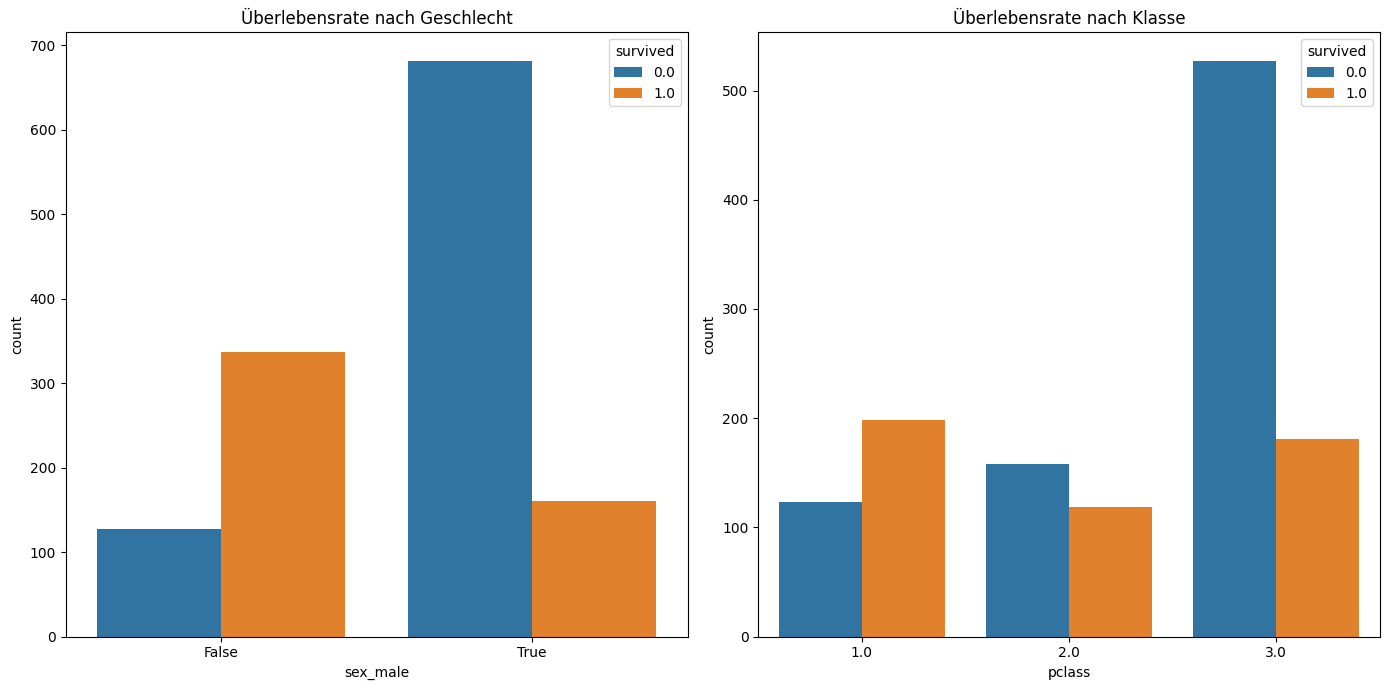

Accuracy: 0.7748091603053435
Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       154
         1.0       0.72      0.73      0.73       108

    accuracy                           0.77       262
   macro avg       0.77      0.77      0.77       262
weighted avg       0.78      0.77      0.77       262



In [66]:
# Explorative Datenanalyse (EDA)
def explorative_data_analysis():
    plt.figure(figsize=(14, 7))

    # Visualisierung der Überlebensrate nach Geschlecht
    plt.subplot(1, 2, 1)
    sns.countplot(x='sex_male', hue='survived', data=df)
    plt.title('Überlebensrate nach Geschlecht')

    # Visualisierung der Überlebensrate nach Klasse
    plt.subplot(1, 2, 2)
    sns.countplot(x='pclass', hue='survived', data=df)
    plt.title('Überlebensrate nach Klasse')

    plt.tight_layout()
    plt.show()

# Feature-Engineering: Auswahl der Features für das Modell
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
X = df[features]
y = df['survived']

# Split in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modellierung: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation: Genauigkeit und Bericht
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualisierungen anzeigen und Evaluierung ausgeben
explorative_data_analysis()

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
